In [183]:
# 데이터
A_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
A_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

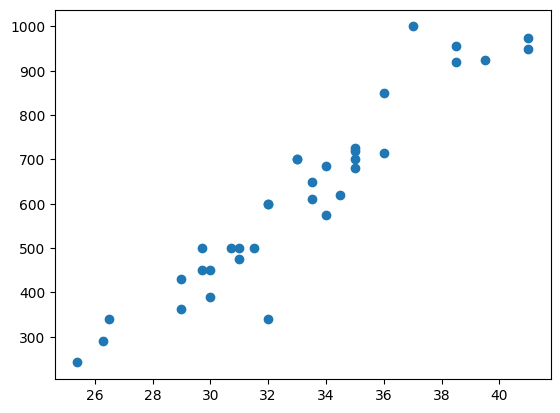

In [184]:
import matplotlib.pyplot as plt
plt.scatter(A_length,A_weight)
plt.show()

In [185]:
B_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
B_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

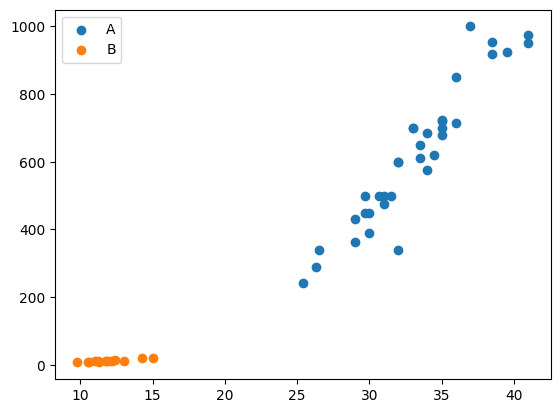

In [186]:
plt.scatter(A_length,A_weight,label='A')
plt.scatter(B_length,B_weight,label='B')
plt.legend()
plt.show()

In [187]:
length = A_length + B_length
weight = A_weight + B_weight
X = [[a,b]for a,b in zip(length,weight)]
y = [1]*len(A_length) + [0]*len(B_length)

In [188]:
from sklearn.neighbors import KNeighborsClassifier

In [189]:
knn = KNeighborsClassifier()
knn.fit(X,y)
knn.score(X,y)

1.0

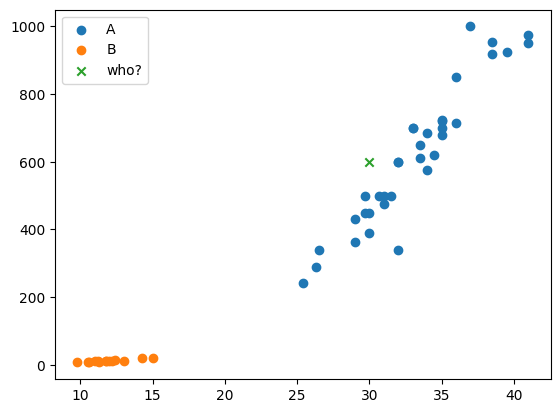

In [190]:
# (30,600) 일때 이것은 과연 어느 그룹인가?
plt.scatter(A_length, A_weight, label = 'A')
plt.scatter(B_length, B_weight, label = 'B')
plt.scatter(30,600, label = 'who?', marker='x')
plt.legend()
plt.show()

In [191]:
knn.predict([[30,600]])

array([1])

In [192]:
knn = KNeighborsClassifier(n_neighbors=len(X))
knn.fit(X,y)
knn.score(X,y)

0.7142857142857143

In [193]:
len(A_length) / len(X)

0.7142857142857143

In [194]:
knn.predict([[13,50]])

array([1])

In [195]:
# 데이터 분할 8:2
split_num = int(len(X)*0.8 )    #
X_train, y_train = X[:split_num], y[:split_num]
X_test, y_test = X[split_num : ], y[split_num : ]


In [196]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_train, y_train), knn.score(X_test, y_test)

(1.0, 1.0)

In [197]:
import numpy as np
np.unique(y_train, return_counts = True)  #y_train에 1밖에 없었음

(array([0, 1]), array([ 4, 35]))

In [198]:
# 데이터 섞기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, stratify=y)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [199]:
knn.score(X_train, y_train), knn.score(X_test, y_test)

(1.0, 1.0)

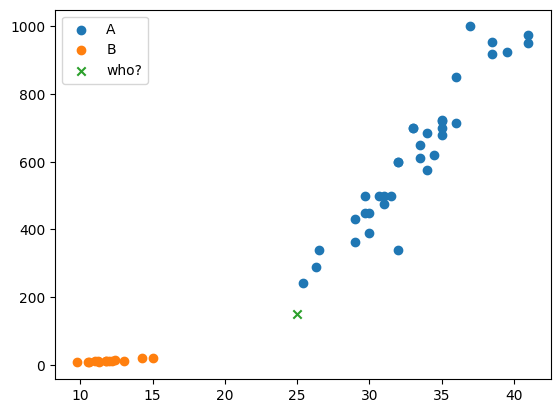

In [200]:
plt.scatter(A_length, A_weight, label = 'A')
plt.scatter(B_length, B_weight, label = 'B')
plt.scatter(25,150, label = 'who?', marker='x')
plt.legend()
plt.show()

In [201]:
knn.predict([[25,150]])

array([0])

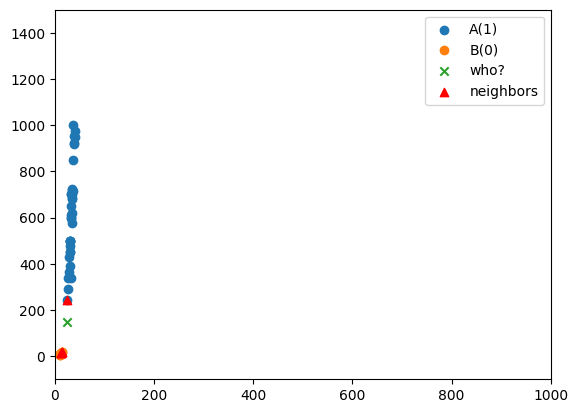

In [202]:
distances, indexs = knn.kneighbors([[25,150]])
plt.scatter(A_length,A_weight,label='A(1)')
plt.scatter(B_length, B_weight, label='B(0)')
plt.scatter(25,150,label = 'who?',marker = 'x')
plt.scatter(np.array(X_train)[indexs,0],np.array(X_train)[indexs,1],
            label = 'neighbors',marker = '^',color='red')
plt.xlim(0,1000)
plt.ylim(-100,1500)
plt.legend()
plt.show()

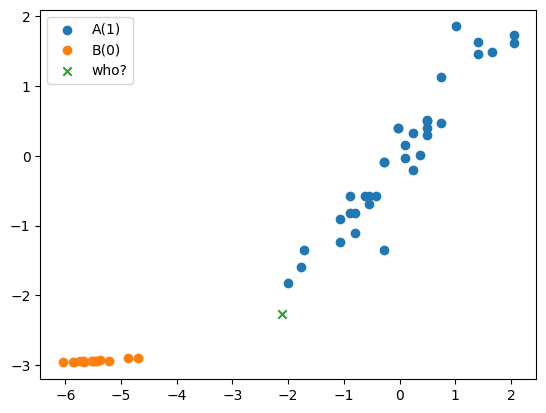

array([[-2.10304398, -2.26886039]])

In [203]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
convert_array_a = np.array(list(zip(A_length,A_weight)))
convert_array_b = np.array(list(zip(B_length,B_weight)))
scaled_a = scaler.fit_transform(convert_array_a)
scaled_b = scaler.transform(convert_array_b)

distances, indexs = knn.kneighbors([[25,150]])
plt.scatter(scaled_a[:,0],scaled_a[:,1],label='A(1)')
plt.scatter(scaled_b[:,0], scaled_b[:,1], label='B(0)')
who_point = scaler.transform([[25,150]])
plt.scatter(who_point[:,0],who_point[:,1],label = 'who?',marker = 'x')
plt.legend()
plt.show()
who_point


In [204]:
# 데이터 섞기
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test =  train_test_split(X,y,random_state=42,stratify=y)
# 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
knn = KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)
knn.predict([[25,150]])

array([1])

In [205]:
# np.array(X_train)
np.array(y_train) == 1

array([ True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True, False,  True,  True, False,  True, False,  True, False,
        True,  True,  True, False,  True,  True, False,  True,  True])

In [206]:
predicted_points = scaler.transform([[25,150]])
predicted_points[:,0][0]

np.float64(-0.23012626562373972)

In [207]:
_, indexs = knn.kneighbors(predicted_points)

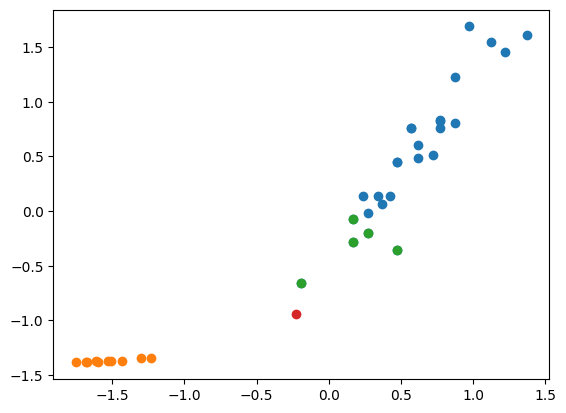

In [208]:
plt.scatter(X_train_scaled[np.array(y_train) == 1,0], 
            X_train_scaled[np.array(y_train)==1,1] )

plt.scatter(X_train_scaled[np.array(y_train) == 0,0], 
            X_train_scaled[np.array(y_train)==0,1] )
plt.scatter(X_train_scaled[indexs,0],X_train_scaled[indexs,1])
plt.scatter(predicted_points[:,0],predicted_points[:,1])

In [209]:
A_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
A_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
B_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
B_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [210]:
X = np.array(list(zip(A_length + B_length, A_weight + B_weight)))
y = np.array([1] * len(A_length) + [0] * len(B_length))
X.shape, y.shape

((49, 2), (49,))

In [211]:
# 데이터를 잘 섞어서 분할
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,stratify=y,test_size=0.2)
# 스케일링
scaled = StandardScaler()
X_train_scaled = scaled.fit_transform(X_train)
X_test_scaled = scaled.transform(X_test)
# 학습
knn = KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)
# [25,150] 을 predict하면 1이 출력되는지 확인
scaled_point = scaled.transform([[25,150]])
knn.predict(scaled_point)

array([1])

In [212]:
# Pipe Line
from sklearn.pipeline import Pipeline
pipe = Pipeline([    
    ( 'scale',StandardScaler() ),
    ( 'cls',KNeighborsClassifier() )
])

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,stratify=y,test_size=0.2)
pipe.fit(X_train,y_train)
pipe.predict([[25,150]])

array([1])

In [213]:
# 딥러닝 : 클래스(nn.Module) nn.Sequential 조립
import torch
import torch.nn as nn

In [214]:
model = nn.Sequential(
    nn.Linear( 2, 8 ),
    nn.ReLU(),
    nn.Linear( 8, 4 ),
    nn.ReLU(),
    nn.Linear( 4, 2 )  # output        
)
# 입력데이터를 텐서로 변경
X_tensor = torch.tensor(X)
y_tensor = torch.tensor(y)
X_train,X_test,y_train,y_test \
    = train_test_split(X_tensor,y_tensor,random_state=42,stratify=y,test_size=0.2)

In [215]:
y_train

tensor([0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
        1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1])

In [216]:
import torch
import torch.optim as optim
# 하이퍼 파라메터
device =  "cuda" if torch.cuda.is_available() else 'cpu'
lr = 1e-03
epochs = 2
model.to(device)

# 손실함수 / 옵티마이져
criterian = nn.CrossEntropyLoss()  # softmax + log 
optim = optim.Adam(model.parameters() , lr=lr)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype = torch.long)

# batch = full dataset
for epoch in range(epochs):
    optim.zero_grad()    
    X_train, y_train = X_train.to(device), y_train.to(device)
    preds = model(X_train)
    print(type(preds), type(y_train))
    loss = criterian(preds,y_train)
    loss.backward()
    optim.step()

    # # if (epoch+1) % 
    # # 정확도 계산
    yhat = torch.argmax(preds,dim=1)
    acc = (yhat == y_train).float().mean()
    print(f'epoch : {epoch+1}  acc: {acc.item()}')

<class 'torch.Tensor'> <class 'torch.Tensor'>
epoch : 1  acc: 0.28205129504203796
<class 'torch.Tensor'> <class 'torch.Tensor'>
epoch : 2  acc: 0.28205129504203796


C:\Users\sally\AppData\Local\Temp\ipykernel_40360\2361591823.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
C:\Users\sally\AppData\Local\Temp\ipykernel_40360\2361591823.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype = torch.long)


In [1]:
import torch
import torch.nn.functional as F

# sigmoid softmax
# class_1, class_2, class_3
output = torch.tensor([3.0,1.0,0.1])

# sigmoid : 개별적으로 적용(0~1) 각 요소가 독립적이여서 여러개가 정답일수있다
print(F.sigmoid(output), sum(F.sigmoid(output)))

# softmax 전체의 합이 1 - 서로 경쟁하는 구조
print(F.softmax(output), sum(F.softmax(output)))

tensor([0.9526, 0.7311, 0.5250]) tensor(2.2086)
tensor([0.8401, 0.1137, 0.0462]) tensor(1.)


C:\Users\sally\AppData\Local\Temp\ipykernel_23504\75767691.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  print(F.softmax(output), sum(F.softmax(output)))
